<a href="https://colab.research.google.com/github/krish2k03/Alzheimer_detection/blob/main/Without_smote_and_voting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

df = pd.read_csv('/content/oasis_longitudinal.csv')
print(df.head())
df.shape

  Subject ID         MRI ID        Group  Visit  MR Delay M_F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   
3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76    12   
4  OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80    12   

   SES  MMSE  CDR  eTIV   nWBV    ASF  
0  2.0  27.0  0.0  1987  0.696  0.883  
1  2.0  30.0  0.0  2004  0.681  0.876  
2  NaN  23.0  0.5  1678  0.736  1.046  
3  NaN  28.0  0.5  1738  0.713  1.010  
4  NaN  22.0  0.5  1698  0.701  1.034  


(373, 15)

<ipython-input-2-a9e0876bac66>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = df.corr()


             Visit  MR Delay       Age      EDUC       SES      MMSE  \
Visit     1.000000  0.920009  0.183213  0.024615 -0.051622 -0.029078   
MR Delay  0.920009  1.000000  0.205357  0.051630 -0.030813  0.065844   
Age       0.183213  0.205357  1.000000 -0.027886 -0.046857  0.055612   
EDUC      0.024615  0.051630 -0.027886  1.000000 -0.722647  0.194884   
SES      -0.051622 -0.030813 -0.046857 -0.722647  1.000000 -0.149219   
MMSE     -0.029078  0.065844  0.055612  0.194884 -0.149219  1.000000   
CDR       0.002325 -0.062915 -0.026257 -0.153121  0.076160 -0.686519   
eTIV      0.117428  0.119624  0.042348  0.257015 -0.261575 -0.032084   
nWBV     -0.126682 -0.105586 -0.518359 -0.012200  0.090095  0.341912   
ASF      -0.120399 -0.123545 -0.035067 -0.241752  0.255576  0.040052   

               CDR      eTIV      nWBV       ASF  
Visit     0.002325  0.117428 -0.126682 -0.120399  
MR Delay -0.062915  0.119624 -0.105586 -0.123545  
Age      -0.026257  0.042348 -0.518359 -0.035067  
EDU

<Axes: >

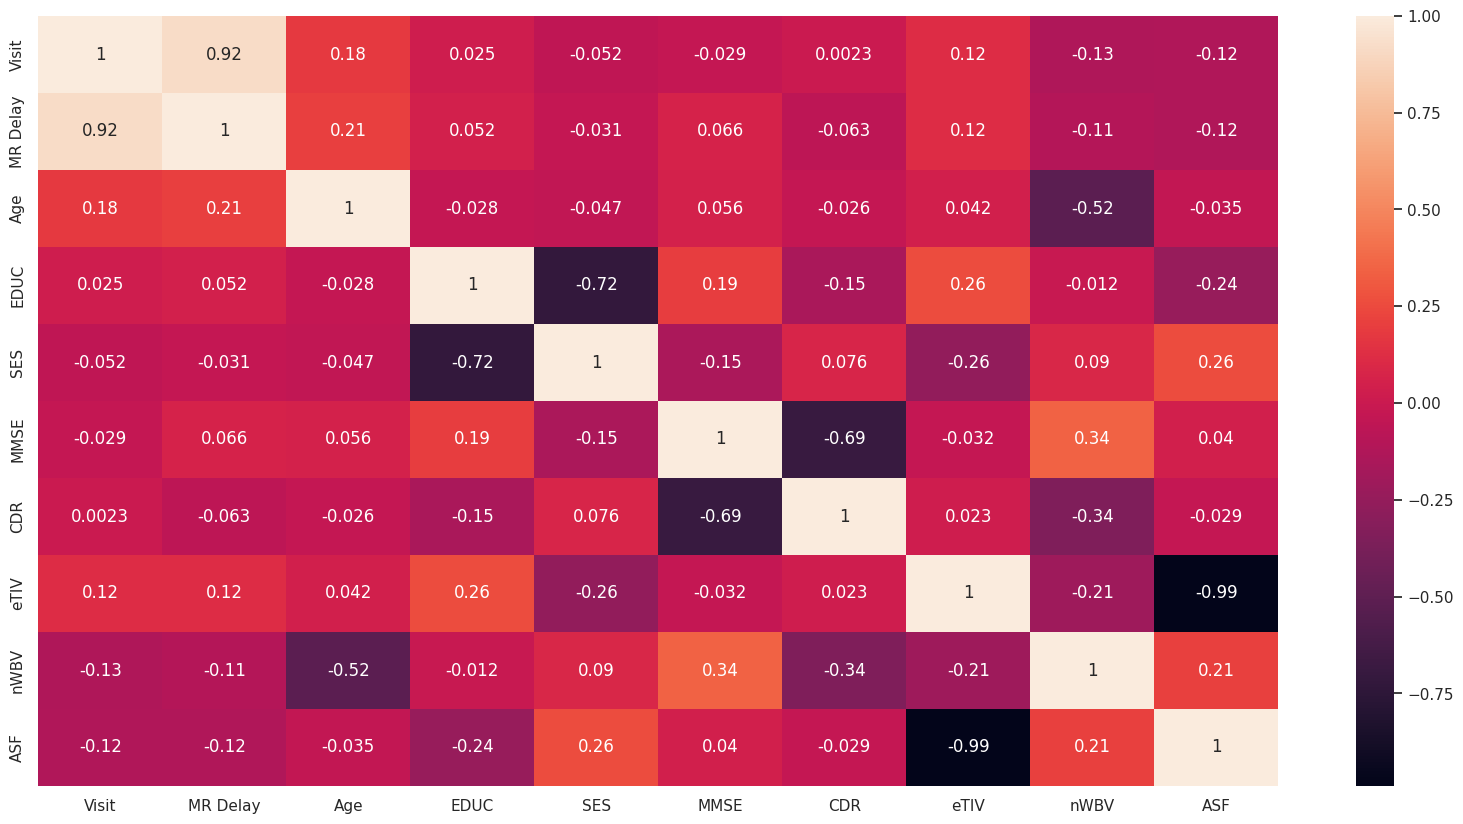

In [2]:
cor_matrix = df.corr()
plt.figure(figsize=(20,10))
print(cor_matrix)
sns.heatmap(cor_matrix,annot=True)

In [3]:
df = df.loc[df['Visit']==1] # use first visit data only because of the analysis we're doing
df = df.reset_index(drop=True) # reset index after filtering first visit data
df['M_F'] = df['M_F'].replace(['F','M'], [0,1]) # M/F column
df['Group'] = df['Group'].replace(['Converted'], ['Demented']) # Target variable
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0]) # Target variable
df = df.drop(['MRI ID','MR Delay','Visit', 'Hand'], axis=1) # Drop unnecessary columns

<ipython-input-4-a9e0876bac66>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = df.corr()


          Group       M_F       Age      EDUC       SES      MMSE       CDR  \
Group  1.000000  0.210282  0.002058 -0.212378  0.068819 -0.530773  0.768221   
M_F    0.210282  1.000000 -0.062457  0.070563 -0.033024 -0.218365  0.203178   
Age    0.002058 -0.062457  1.000000 -0.065513 -0.016734 -0.022629 -0.039313   
EDUC  -0.212378  0.070563 -0.065513  1.000000 -0.725770  0.216439 -0.227556   
SES    0.068819 -0.033024 -0.016734 -0.725770  1.000000 -0.180484  0.137950   
MMSE  -0.530773 -0.218365 -0.022629  0.216439 -0.180484  1.000000 -0.691874   
CDR    0.768221  0.203178 -0.039313 -0.227556  0.137950 -0.691874  1.000000   
eTIV  -0.031369  0.571898 -0.009693  0.236263 -0.244047 -0.051549  0.037608   
nWBV  -0.265774 -0.241635 -0.558027  0.048484  0.028227  0.322025 -0.310813   
ASF    0.021365 -0.564241  0.020708 -0.218819  0.235480  0.059661 -0.039840   

           eTIV      nWBV       ASF  
Group -0.031369 -0.265774  0.021365  
M_F    0.571898 -0.241635 -0.564241  
Age   -0.009693 

<Axes: >

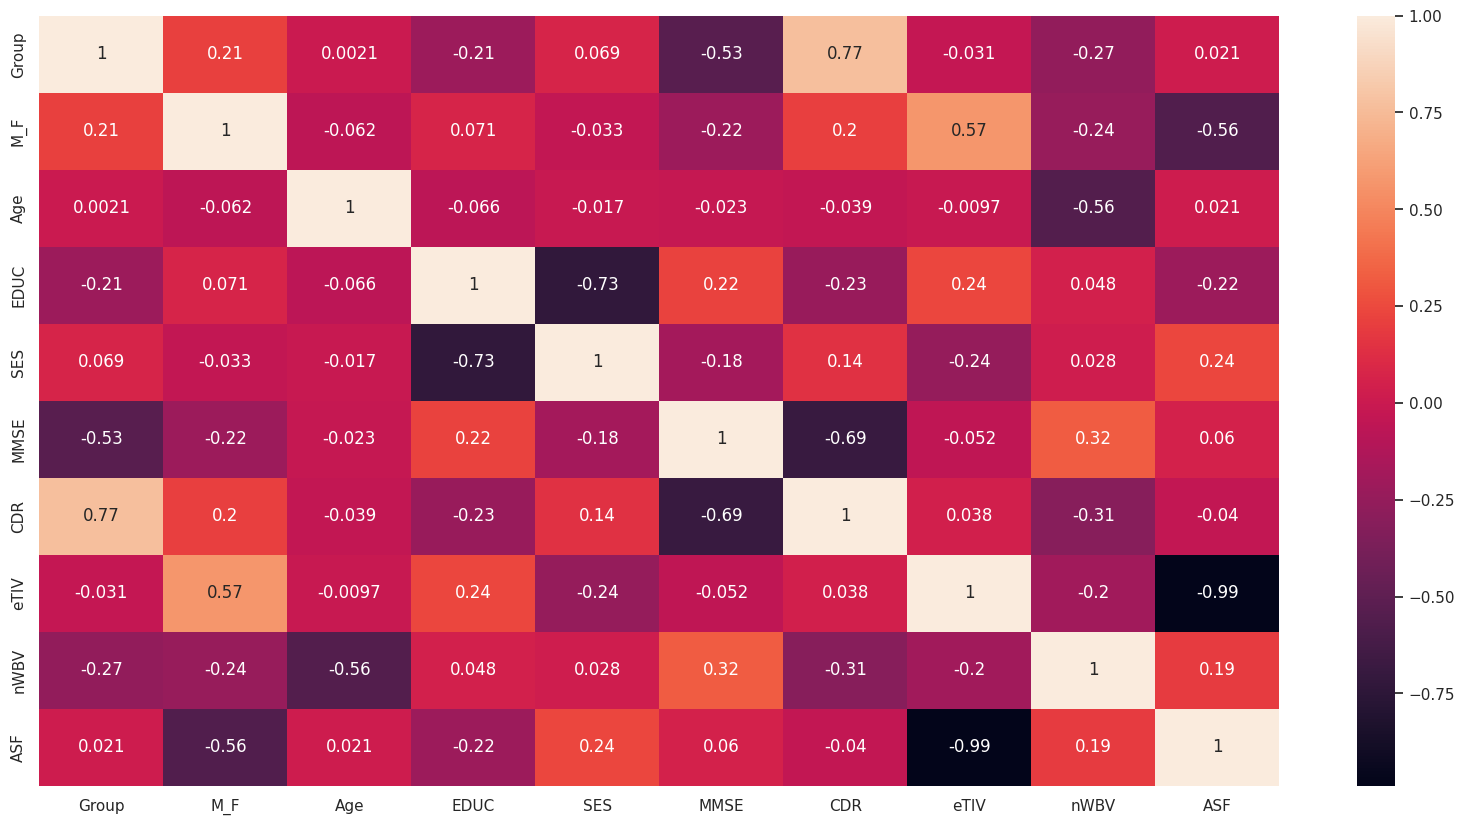

In [4]:
cor_matrix = df.corr()
plt.figure(figsize=(20,10))
print(cor_matrix)
sns.heatmap(cor_matrix,annot=True)

In [5]:
# Check missing values by each column
pd.isnull(df).sum()
# The column, SES has 8 missing values

Subject ID    0
Group         0
M_F           0
Age           0
EDUC          0
SES           8
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [6]:
# Dropped the 8 rows with missing values in the column, SES
df_dropna = df.dropna(axis=0, how='any')
pd.isnull(df_dropna).sum()

Subject ID    0
Group         0
M_F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [7]:
df_dropna['Group'].value_counts()

0    72
1    70
Name: Group, dtype: int64

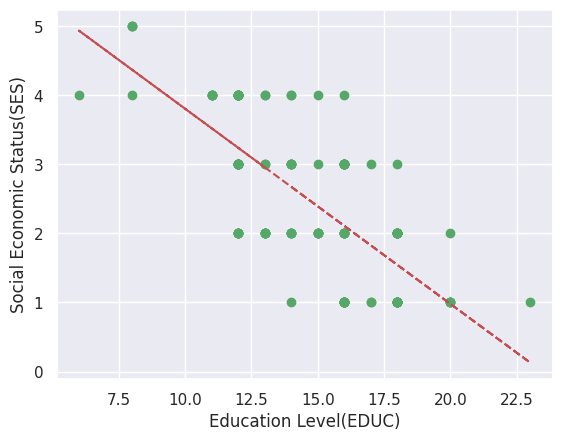

In [8]:
# Draw scatter plot between EDUC and SES
x = df['EDUC']
y = df['SES']

ses_not_null_index = y[~y.isnull()].index
x = x[ses_not_null_index]
y = y[ses_not_null_index]

# Draw trend line in red
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, y, 'go', x, p(x), "r--")
plt.xlabel('Education Level(EDUC)')
plt.ylabel('Social Economic Status(SES)')

plt.show()

In [9]:
df.groupby(['EDUC'])['SES'].median()

EDUC
6     4.0
8     5.0
11    4.0
12    3.0
13    2.0
14    3.0
15    2.0
16    2.0
17    1.0
18    2.0
20    1.0
23    1.0
Name: SES, dtype: float64

In [10]:
df["SES"].fillna(df.groupby("EDUC")["SES"].transform("median"), inplace=True)

In [11]:
pd.isnull(df['SES']).value_counts()

False    150
Name: SES, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [14]:
# Dataset after dropping missing value rows
Y = df_dropna['Group'].values # Target for the model
X = df_dropna[['M_F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]
 # Features we use

# splitting into three sets
X_trainval_dna, X_test_dna, Y_trainval_dna, Y_test_dna = train_test_split(
    X, Y, random_state=0)

# Feature scaling
scaler = MinMaxScaler().fit(X_trainval_dna)
X_trainval_scaled_dna = scaler.transform(X_trainval_dna)
X_test_scaled_dna = scaler.transform(X_test_dna)

<ipython-input-15-79d94b77ff4c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = df_dropna.corr().abs()


          Group       M_F       Age      EDUC       SES      MMSE       CDR  \
Group  1.000000  0.212298  0.000799  0.182332  0.068819  0.533488  0.759728   
M_F    0.212298  1.000000  0.050858  0.071606  0.033024  0.203597  0.204831   
Age    0.000799  0.050858  1.000000  0.060296  0.016734  0.029735  0.041102   
EDUC   0.182332  0.071606  0.060296  1.000000  0.725770  0.203361  0.205277   
SES    0.068819  0.033024  0.016734  0.725770  1.000000  0.180484  0.137950   
MMSE   0.533488  0.203597  0.029735  0.203361  0.180484  1.000000  0.699752   
CDR    0.759728  0.204831  0.041102  0.205277  0.137950  0.699752  1.000000   
eTIV   0.026861  0.569173  0.010867  0.248045  0.244047  0.034765  0.043814   
nWBV   0.267081  0.235480  0.568690  0.039323  0.028227  0.318791  0.312147   
ASF    0.016288  0.561735  0.023547  0.230543  0.235480  0.045040  0.046499   

           eTIV      nWBV       ASF  
Group  0.026861  0.267081  0.016288  
M_F    0.569173  0.235480  0.561735  
Age    0.010867 

<Axes: >

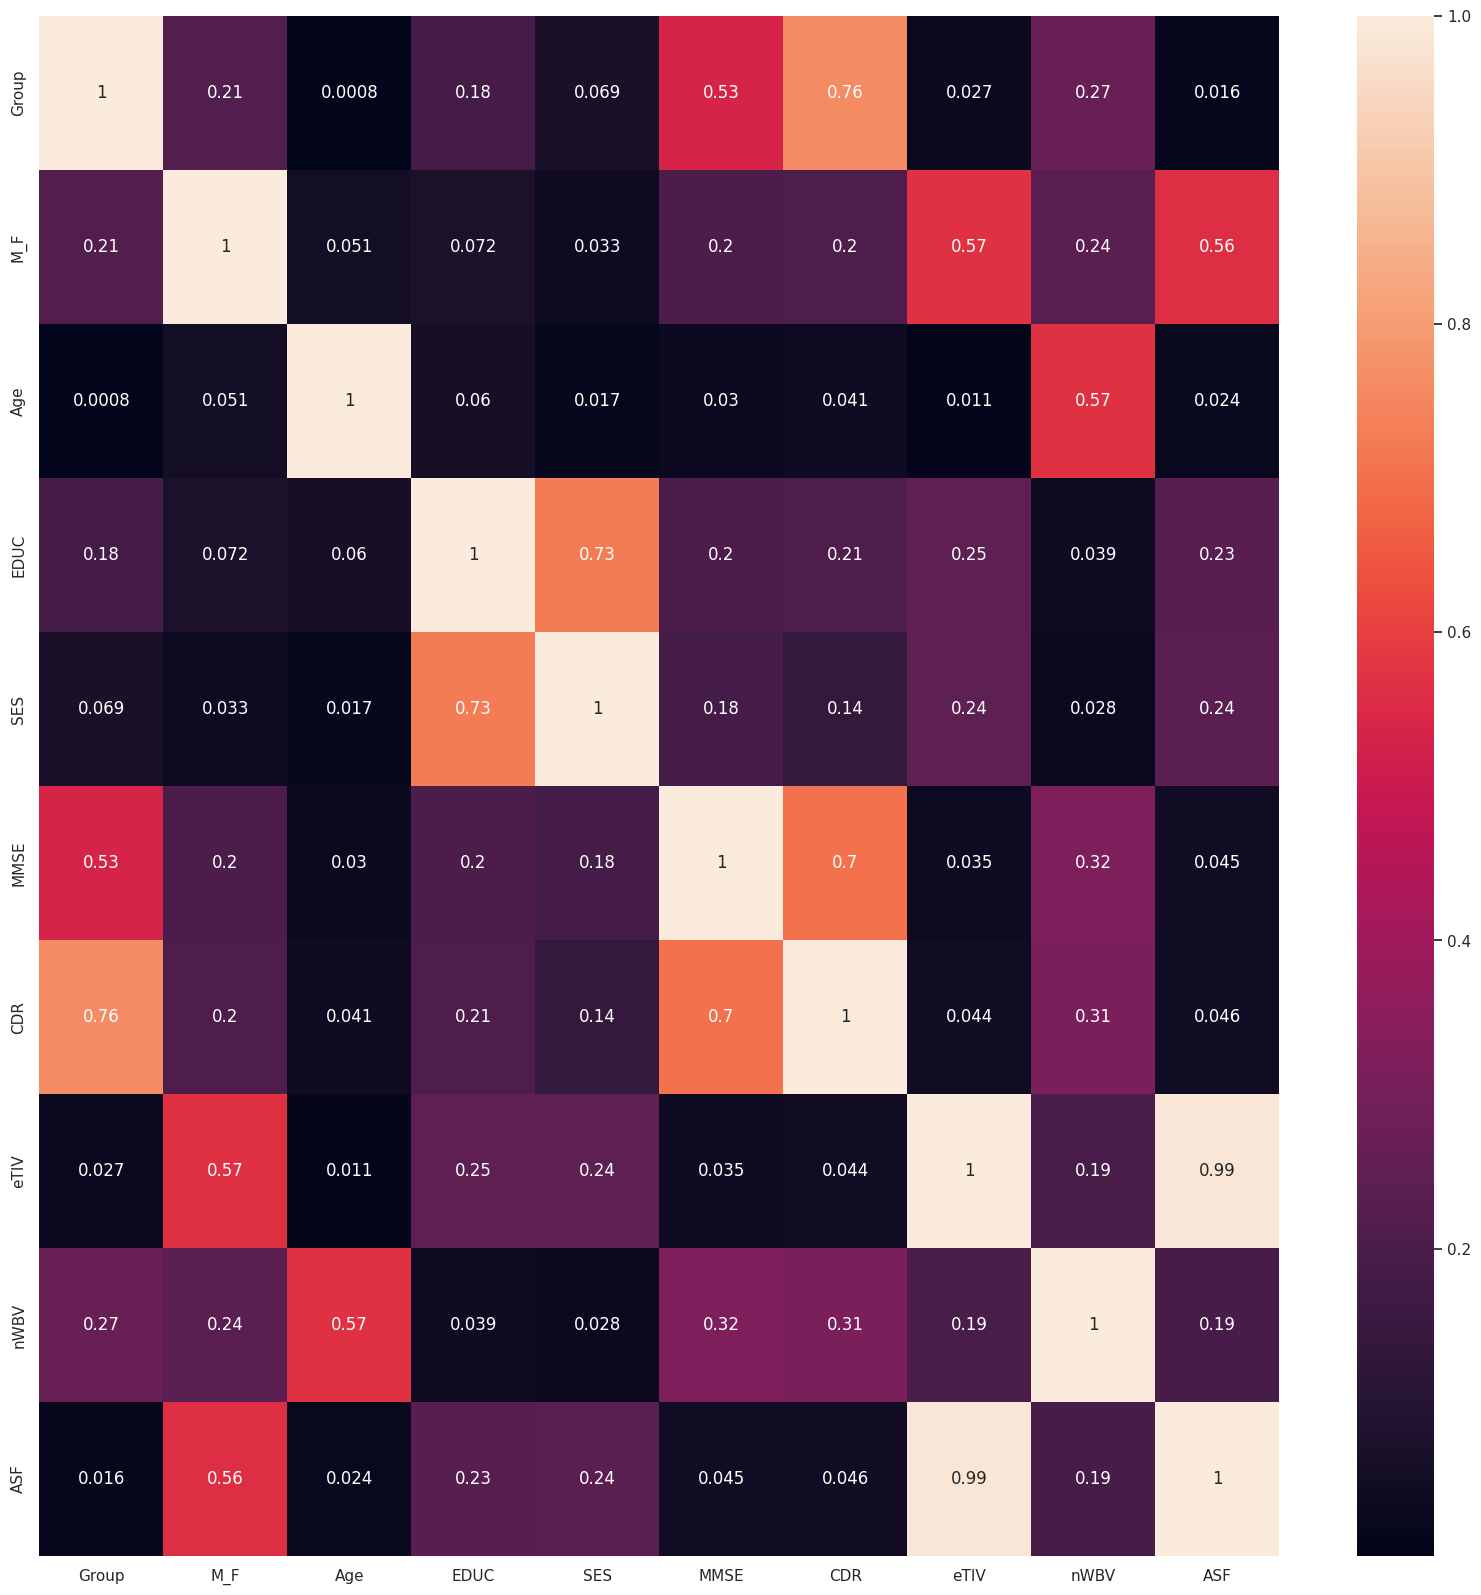

In [15]:
cor_matrix = df_dropna.corr().abs()
plt.figure(figsize=(20,20))
print(cor_matrix)
sns.heatmap(cor_matrix,annot=True)

Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc,f1_score,precision_score

In [17]:
acc = [] # list to store all performance metric

In [18]:
estimator = []

In [19]:
# Dataset after dropping missing value rows
best_score=0
kfolds=5 # set the number of folds

for c in [0.001, 0.1, 1, 10, 100]:
    logRegModel = LogisticRegression(C=c)
    # perform cross-validation
    scores = cross_val_score(logRegModel, X_trainval_scaled_dna, Y_trainval_dna, cv=kfolds, scoring='accuracy')

    # compute mean cross-validation accuracy
    score = np.mean(scores)

    # Find the best parameters and score
    if score > best_score:
        best_score = score
        best_parameters = c

# rebuild a model on the combined training and validation set
SelectedLogRegModel = LogisticRegression(C=best_parameters).fit(X_trainval_scaled_dna, Y_trainval_dna)
#estimator.append(('LR',LogisticRegression(C=best_parameters)))

test_score = SelectedLogRegModel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedLogRegModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
test_F1_score=f1_score(Y_test, PredictedOutput, pos_label=1)
test_precision=precision_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test F1_score with the best C parameter is", test_F1_score)
print("Test Precision with the best C parameter is", test_precision)
print("Test AUC with the best C parameter is", test_auc)

m = 'Logistic Regression (w/ dropna)'
acc.append([m, test_score, test_recall,test_F1_score,test_precision,test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.725974025974026
Best parameter for regularization (C) is:  10
Test accuracy with best C parameter is 0.8421052631578947
Test recall with the best C parameter is 0.8
Test F1_score with the best C parameter is 0.8421052631578948
Test Precision with the best C parameter is 0.8888888888888888
Test AUC with the best C parameter is 0.8444444444444443


SVM

In [20]:
best_score = 0

for c_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter C
    for gamma_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter gamma
        for k_parameter in ['rbf', 'linear', 'poly', 'sigmoid']: # iterate over the values we need to try for the kernel parameter
            svmModel = SVC(kernel=k_parameter, C=c_paramter, gamma=gamma_paramter) #define the model
            # perform cross-validation
            scores = cross_val_score(svmModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')
            # the training set will be split internally into training and cross validation

            # compute mean cross-validation accuracy
            score = np.mean(scores)
            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score #store the score
                best_parameter_c = c_paramter #store the parameter c
                best_parameter_gamma = gamma_paramter #store the parameter gamma
                best_parameter_k = k_parameter


# rebuild a model with best parameters to get score
SelectedSVMmodel = SVC(C=best_parameter_c, gamma=best_parameter_gamma, kernel=best_parameter_k).fit(X_trainval_scaled, Y_trainval)
#estimator.append(('SVM',SVC(C=best_parameter_c, gamma=best_parameter_gamma, kernel=best_parameter_k)))
test_score = SelectedLogRegModel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedLogRegModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
test_F1_score=f1_score(Y_test, PredictedOutput, pos_label=1)
test_precision=precision_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test F1_score with the best C parameter is", test_F1_score)
print("Test Precision with the best C parameter is", test_precision)
print("Test AUC with the best C parameter is", test_auc)
m = 'SVM'
acc.append([m, test_score, test_recall,test_F1_score,test_precision,test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.76875
Best parameter for regularization (C) is:  10
Test accuracy with best C parameter is 0.8421052631578947
Test recall with the best C parameter is 0.8
Test F1_score with the best C parameter is 0.8421052631578948
Test Precision with the best C parameter is 0.8888888888888888
Test AUC with the best C parameter is 0.8444444444444443


Decision Tree

In [21]:
best_score = 0

for md in range(1, 9): # iterate different maximum depth values
    # train the model
    treeModel = DecisionTreeClassifier(random_state=0, max_depth=md, criterion='gini')
    # perform cross-validation
    scores = cross_val_score(treeModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

    # compute mean cross-validation accuracy
    score = np.mean(scores)

    # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_parameter = md

# Rebuild a model on the combined training and validation set
SelectedDTModel = DecisionTreeClassifier(max_depth=best_parameter).fit(X_trainval_scaled, Y_trainval )
#estimator.append(('DT',DecisionTreeClassifier(max_depth=best_parameter)))

test_score = SelectedDTModel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedDTModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
test_F1_score=f1_score(Y_test, PredictedOutput, pos_label=1)
test_precision=precision_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test F1_score with the best C parameter is", test_F1_score)
print("Test Precision with the best C parameter is", test_precision)
print("Test AUC with the best C parameter is", test_auc)

m = 'Decision Tree'
acc.append([m, test_score, test_recall,test_F1_score,test_precision,test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.794758064516129
Best parameter for regularization (C) is:  10
Test accuracy with best C parameter is 0.8157894736842105
Test recall with the best C parameter is 0.65
Test F1_score with the best C parameter is 0.787878787878788
Test Precision with the best C parameter is 1.0
Test AUC with the best C parameter is 0.825


In [22]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedDTModel.feature_importances_)]).T

Feature importance: 


array([['M_F', '0.0'],
       ['Age', '0.0'],
       ['EDUC', '0.0'],
       ['SES', '0.0'],
       ['MMSE', '1.0'],
       ['eTIV', '0.0'],
       ['nWBV', '0.0'],
       ['ASF', '0.0']], dtype='<U32')

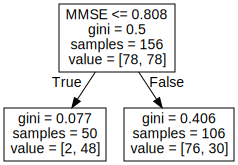

In [23]:
from sklearn.tree import export_graphviz
import graphviz
dot_data=export_graphviz(SelectedDTModel, feature_names=X_trainval.columns.values.tolist(),out_file=None)
graph = graphviz.Source(dot_data)
graph

RF

In [24]:
best_score = 0

for M in range(2, 15, 2): # combines M trees
    for d in range(1, 9): # maximum number of features considered at each split
        for m in range(1, 9): # maximum depth of the tree
            # train the model
            # n_jobs(4) is the number of parallel computing
            forestModel = RandomForestClassifier(n_estimators=M, max_features=d, n_jobs=4,
                                          max_depth=m, random_state=0)

            # perform cross-validation
            scores = cross_val_score(forestModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

            # compute mean cross-validation accuracy
            score = np.mean(scores)

            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score
                best_M = M
                best_d = d
                best_m = m

# Rebuild a model on the combined training and validation set
SelectedRFModel = RandomForestClassifier(n_estimators=M, max_features=d,
                                          max_depth=m, random_state=0).fit(X_trainval_scaled, Y_trainval )

#estimator.append(('RT',RandomForestClassifier(n_estimators=M, max_features=d, max_depth=m, random_state=0)))
PredictedOutput = SelectedRFModel.predict(X_test_scaled)
test_score = SelectedRFModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
test_F1_score=f1_score(Y_test, PredictedOutput, pos_label=1)
test_precision=precision_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test F1_score with the best C parameter is", test_F1_score)
print("Test Precision with the best C parameter is", test_precision)
print("Test AUC with the best C parameter is", test_auc)

m = 'Random Forest'
acc.append([m, test_score, test_recall,test_F1_score,test_precision,test_auc, fpr, tpr, thresholds])



Best accuracy on validation set is: 0.8008064516129032
Best parameter for regularization (C) is:  10
Test accuracy with best C parameter is 0.9473684210526315
Test recall with the best C parameter is 0.9
Test F1_score with the best C parameter is 0.9473684210526316
Test Precision with the best C parameter is 1.0
Test AUC with the best C parameter is 0.95


In [25]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedRFModel.feature_importances_)]).T

Feature importance: 


array([['M_F', '0.03272614516882067'],
       ['Age', '0.08867628368851577'],
       ['EDUC', '0.06492292805740985'],
       ['SES', '0.06499245425708992'],
       ['MMSE', '0.4182778795501145'],
       ['eTIV', '0.07921316937549303'],
       ['nWBV', '0.15813355490217915'],
       ['ASF', '0.09305758500037715']], dtype='<U32')

Adaboost

In [26]:
best_score = 0

for M in range(2, 15, 2): # combines M trees
    for lr in [0.0001, 0.001, 0.01, 0.1, 1]:
        # train the model
        boostModel = AdaBoostClassifier(n_estimators=M, learning_rate=lr, random_state=0)

        # perform cross-validation
        scores = cross_val_score(boostModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

        # compute mean cross-validation accuracy
        score = np.mean(scores)

        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_M = M
            best_lr = lr

# Rebuild a model on the combined training and validation set
SelectedBoostModel = AdaBoostClassifier(n_estimators=M, learning_rate=lr, random_state=0).fit(X_trainval_scaled, Y_trainval )
#estimator.append(('AB',AdaBoostClassifier(n_estimators=M, learning_rate=lr, random_state=0)))

PredictedOutput = SelectedBoostModel.predict(X_test_scaled)
test_score = SelectedRFModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
test_F1_score=f1_score(Y_test, PredictedOutput, pos_label=1)
test_precision=precision_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test F1_score with the best C parameter is", test_F1_score)
print("Test Precision with the best C parameter is", test_precision)
print("Test AUC with the best C parameter is", test_auc)
m = 'AdaBoost'
acc.append([m, test_score, test_recall,test_F1_score,test_precision,test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.794758064516129
Best parameter for regularization (C) is:  10
Test accuracy with best C parameter is 0.9473684210526315
Test recall with the best C parameter is 0.7
Test F1_score with the best C parameter is 0.8235294117647058
Test Precision with the best C parameter is 1.0
Test AUC with the best C parameter is 0.85


In [27]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedBoostModel.feature_importances_)]).T

Feature importance: 


array([['M_F', '0.07142857142857142'],
       ['Age', '0.14285714285714285'],
       ['EDUC', '0.0'],
       ['SES', '0.0'],
       ['MMSE', '0.14285714285714285'],
       ['eTIV', '0.21428571428571427'],
       ['nWBV', '0.42857142857142855'],
       ['ASF', '0.0']], dtype='<U32')

LightGBM

In [28]:
import lightgbm

best_score = 0

for M in range(2, 15, 2): # combines M trees
    for lr in [0.0001, 0.001, 0.01, 0.1, 1]:
        # train the model
        LGBMModel = lightgbm.LGBMClassifier(n_estimators=M, learning_rate=lr, random_state=0)

        # perform cross-validation
        scores = cross_val_score(LGBMModel, X_trainval, Y_trainval, cv=kfolds, scoring='accuracy')

        # compute mean cross-validation accuracy
        score = np.mean(scores)

        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_M = M
            best_lr = lr

# Rebuild a model on the combined training and validation set
SelectedLGBMModel = lightgbm.LGBMClassifier(n_estimators=M, learning_rate=lr, random_state=0).fit(X_trainval, Y_trainval )

PredictedOutput = SelectedLGBMModel.predict(X_test_scaled)
test_score = SelectedLGBMModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
test_F1_score=f1_score(Y_test, PredictedOutput, pos_label=1)
test_precision=precision_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test F1_score with the best C parameter is", test_F1_score)
print("Test Precision with the best C parameter is", test_precision)
print("Test AUC with the best C parameter is", test_auc)

m = 'LightGBM'
acc.append([m, test_score, test_recall,test_F1_score,test_precision,test_auc, fpr, tpr, thresholds])

[LightGBM] [Info] Number of positive: 62, number of negative: 62
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 176
[LightGBM] [Info] Number of data points in the train set: 124, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 63, number of negative: 62
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 172
[LightGBM] [Info] Number of data points in the train set: 125, number of used features: 8
[LightG

In [29]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedBoostModel.feature_importances_)]).T

Feature importance: 


array([['M_F', '0.07142857142857142'],
       ['Age', '0.14285714285714285'],
       ['EDUC', '0.0'],
       ['SES', '0.0'],
       ['MMSE', '0.14285714285714285'],
       ['eTIV', '0.21428571428571427'],
       ['nWBV', '0.42857142857142855'],
       ['ASF', '0.0']], dtype='<U32')

XGBoost

In [30]:
import xgboost as xgb

best_score = 0

for M in range(2, 15, 2): # combines M trees
    for lr in [0.0001, 0.001, 0.01, 0.1, 1]:
        # train the model
        XGBRFmodel = xgb.XGBRFClassifier(n_estimators=M, learning_rate=lr, random_state=0)

        # perform cross-validation
        scores = cross_val_score(XGBRFmodel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

        # compute mean cross-validation accuracy
        score = np.mean(scores)

        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_M = M
            best_lr = lr

# Rebuild a model on the combined training and validation set
SelectedXGBRFModel = xgb.XGBRFClassifier(n_estimators=M, learning_rate=lr, random_state=0).fit(X_trainval_scaled, Y_trainval )
#estimator.append(('XGB',xgb.XGBRFClassifier(n_estimators=M, learning_rate=lr, random_state=0)))


PredictedOutput = SelectedXGBRFModel.predict(X_test_scaled)
test_score = SelectedXGBRFModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
test_F1_score=f1_score(Y_test, PredictedOutput, pos_label=1)
test_precision=precision_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test F1_score with the best C parameter is", test_F1_score)
print("Test Precision with the best C parameter is", test_precision)
print("Test AUC with the best C parameter is", test_auc)

m = 'XGBRFClassifier'
acc.append([m, test_score, test_recall,test_F1_score,test_precision,test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.7756048387096774
Best parameter for regularization (C) is:  10
Test accuracy with best C parameter is 0.9210526315789473
Test recall with the best C parameter is 0.85
Test F1_score with the best C parameter is 0.9189189189189189
Test Precision with the best C parameter is 1.0
Test AUC with the best C parameter is 0.925


In [31]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedBoostModel.feature_importances_)]).T

Feature importance: 


array([['M_F', '0.07142857142857142'],
       ['Age', '0.14285714285714285'],
       ['EDUC', '0.0'],
       ['SES', '0.0'],
       ['MMSE', '0.14285714285714285'],
       ['eTIV', '0.21428571428571427'],
       ['nWBV', '0.42857142857142855'],
       ['ASF', '0.0']], dtype='<U32')

Result

In [32]:
# Performance Metric for each model
result = pd.DataFrame(acc, columns=['Model', 'Accuracy', 'Recall', 'F1-Score','Precision', 'AUC', 'FPR', 'TPR', 'TH'])
result[['Model', 'Accuracy', 'Recall','F1-Score','Precision' ,'AUC']]

,Model,Accuracy,Recall,F1-Score,Precision,AUC
0,Logistic Regression (w/ dropna),0.842105,0.80,0.842105,0.888889,0.844444
1,SVM,0.842105,0.80,0.842105,0.888889,0.844444
2,Decision Tree,0.815789,0.65,0.787879,1.000000,0.825000
3,Random Forest,0.947368,0.90,0.947368,1.000000,0.950000
4,AdaBoost,0.947368,0.70,0.823529,1.000000,0.850000
5,LightGBM,0.526316,1.00,0.689655,0.526316,0.500000
6,XGBRFClassifier,0.921053,0.85,0.918919,1.000000,0.925000
